<a href="https://colab.research.google.com/github/AkhilVinayakp/HAR_LSTM_CNN/blob/main/lstm_cnn_mj_al.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# lstm_cnn_model with wisdm int_norm.csv
# testing no. 1 
# passing windo

In [2]:
%cd /content/drive/My\ Drive/datasets 
%pwd

/content/drive/My Drive/datasets


'/content/drive/My Drive/datasets'

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [4]:

df =  pd.read_csv('int_norm.csv')

In [ ]:
df.shape

(1098204, 6)

In [5]:
# creating windowed dataset
# data windowing function test case passed
def create_windowed_dataset(series, window_size,shift_size, batch_size,shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size , shift = shift_size, drop_remainder = True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:,1:],window[window_size - 1,0]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [6]:
df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.054655,0.997718,0.039652
1,33,Jogging,49106062271000,0.405338,0.910910,0.077102
2,33,Jogging,49106112167000,0.410782,0.911708,-0.006846
3,33,Jogging,49106222305000,-0.032685,0.986373,0.161248
4,33,Jogging,49106332290000,-0.083804,0.856341,0.509566


In [7]:
df.drop('timestamp', axis = 1, inplace=True)

In [8]:
# /// added : one hot encoding before spliting

df['activity'] = df['activity'].astype("category")
df['activity'] = df.activity.cat.codes

In [ ]:
#  keep the codes encode in the windowing function

In [ ]:
# labels

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
# now for windowing purpose making the labels as part of 

In [9]:
train = df[df['user'] < 31 ]

In [10]:
test = df[df['user'] > 30]

In [11]:
print(train.shape)
print(test.shape)

(898361, 5)
(199843, 5)


In [12]:
train.head()

,user,activity,x-axis,y-axis,z-axis
8489,17,5,0.058149,0.996847,-0.053996
8490,17,5,-0.000000,0.998427,-0.056061
8491,17,5,-0.023448,0.997247,-0.070345
8492,17,5,0.014845,0.998642,-0.049932
8493,17,5,0.014737,0.998072,-0.060286


In [13]:
train.drop('user', axis = 1, inplace=True)
test.drop('user', axis = 1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
train.reset_index(drop = True, inplace = True)

In [15]:
train.head()

,activity,x-axis,y-axis,z-axis
0,5,0.058149,0.996847,-0.053996
1,5,-0.000000,0.998427,-0.056061
2,5,-0.023448,0.997247,-0.070345
3,5,0.014845,0.998642,-0.049932
4,5,0.014737,0.998072,-0.060286


In [16]:
train.reset_index(drop = True, inplace = True)
train.head()

,activity,x-axis,y-axis,z-axis
0,5,0.058149,0.996847,-0.053996
1,5,-0.000000,0.998427,-0.056061
2,5,-0.023448,0.997247,-0.070345
3,5,0.014845,0.998642,-0.049932
4,5,0.014737,0.998072,-0.060286


In [17]:
# enoding the labels of the data to categorical
from tensorflow.keras.utils import  to_categorical

In [18]:
df.dtypes

user          int64
activity       int8
x-axis      float64
y-axis      float64
z-axis      float64
dtype: object

In [19]:
df['activity'] = df['activity'].astype("category")

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# train['activity']= OneHotEncoder().fit_transform(train['activity'].values.reshape(-1,1))

In [20]:
train['activity']

0         5
1         5
2         5
3         5
4         5
         ..
898356    2
898357    2
898358    2
898359    2
898360    2
Name: activity, Length: 898361, dtype: int8

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# train_target = train['activity'].values

In [ ]:
# type(train_target)

numpy.ndarray

In [ ]:
# enc = LabelEncoder()
# enc_train_target = enc.fit_transform(train_target)

In [ ]:
# np.unique(enc_train_target)

array([0, 1, 2, 3, 4, 5])

In [21]:
# converting to codes
train['activity'] = train['activity'].astype("category")
train.activity = train.activity.cat.codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [22]:
train.head()

,activity,x-axis,y-axis,z-axis
0,5,0.058149,0.996847,-0.053996
1,5,-0.000000,0.998427,-0.056061
2,5,-0.023448,0.997247,-0.070345
3,5,0.014845,0.998642,-0.049932
4,5,0.014737,0.998072,-0.060286


In [23]:
train.dtypes

activity       int8
x-axis      float64
y-axis      float64
z-axis      float64
dtype: object

In [ ]:
labels = to_categorical(train['activity'].values,num_classes=6, dtype='float32')

In [ ]:
labels

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
type(labels)

numpy.ndarray

In [24]:
train.head()

,activity,x-axis,y-axis,z-axis
0,5,0.058149,0.996847,-0.053996
1,5,-0.000000,0.998427,-0.056061
2,5,-0.023448,0.997247,-0.070345
3,5,0.014845,0.998642,-0.049932
4,5,0.014737,0.998072,-0.060286


In [25]:
train.tail()

,activity,x-axis,y-axis,z-axis
898356,2,0.968689,-0.168982,0.181898
898357,2,0.970048,-0.156667,0.185640
898358,2,0.972323,-0.147776,0.180972
898359,2,0.969793,-0.157322,0.186416
898360,2,0.973444,-0.145797,0.176492


In [26]:
train.activity.unique()

array([5, 1, 4, 0, 2, 3], dtype=int8)

In [ ]:
t = tf.Variable(np.arange(2,21))

In [ ]:
t.dtype

tf.int64

In [ ]:
t

<tf.Variable 'Variable:0' shape=(19,) dtype=int64, numpy=
array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])>

In [ ]:
m = to_categorical(t.numpy())

In [ ]:
m

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0.,

In [ ]:
###########################################################################################################################################

# data windowing isolated windowing of features and labels required



###########################################################################################################################################

In [ ]:
# Testing for visualizations
df.head()

,user,activity,timestamp,x-axis,y-axis,z-axis
0,33,Jogging,49105962326000,-0.054655,0.997718,0.039652
1,33,Jogging,49106062271000,0.405338,0.910910,0.077102
2,33,Jogging,49106112167000,0.410782,0.911708,-0.006846
3,33,Jogging,49106222305000,-0.032685,0.986373,0.161248
4,33,Jogging,49106332290000,-0.083804,0.856341,0.509566


In [ ]:
f = df[['activity','x-axis','y-axis','z-axis']]

In [ ]:
import seaborn as sns

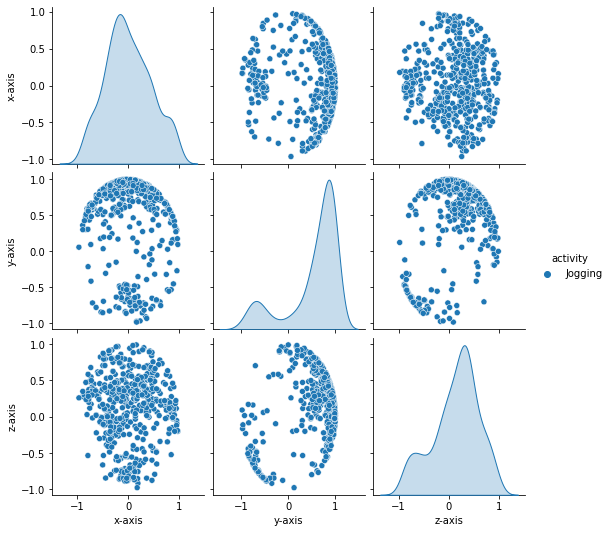

In [ ]:
sns.pairplot(f[:500], hue='activity')

In [ ]:
df['activity'].value_counts()

Walking       424398
Jogging       342176
Upstairs      122869
Downstairs    100427
Sitting        59939
Standing       48395
Name: activity, dtype: int64

<BarContainer object of 6 artists>

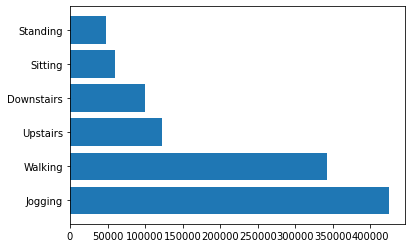

In [ ]:
plt.barh(df['activity'].unique(),df['activity'].value_counts())

In [28]:
# 30: march: 2021

In [29]:
train.head()

,activity,x-axis,y-axis,z-axis
0,5,0.058149,0.996847,-0.053996
1,5,-0.000000,0.998427,-0.056061
2,5,-0.023448,0.997247,-0.070345
3,5,0.014845,0.998642,-0.049932
4,5,0.014737,0.998072,-0.060286


In [30]:
test.head()

,activity,x-axis,y-axis,z-axis
0,1,-0.054655,0.997718,0.039652
1,1,0.405338,0.910910,0.077102
2,1,0.410782,0.911708,-0.006846
3,1,-0.032685,0.986373,0.161248
4,1,-0.083804,0.856341,0.509566


In [31]:
train.shape

(898361, 4)

In [32]:
test.shape

(199843, 4)

In [67]:
train_winodowed = create_windowed_dataset(train, 128, 64, 192, 128)

In [68]:
#  converting back to numpy array
train_b = list(train_winodowed.as_numpy_iterator())

In [ ]:
count = 0
for i in train_b:
  count = count +1
  if count < 40:
    print(i)

(74, 2)

In [70]:
features = []
target = []
for i in train_b:
  print(i)
  print('*************************')
  features.append(i[0])
  target.append(i[1])

(array([[[ 0.57029953,  0.80530919, -0.16197392],
        [ 0.63439766,  0.7319973 , -0.24843422],
        [ 0.85643886,  0.5162259 ,  0.00482689],
        ...,
        [-0.17428926,  0.89012017, -0.42108116],
        [-0.28846233,  0.90938971,  0.29966623],
        [ 0.88544544,  0.28314149,  0.36853395]],

       [[ 0.06751677,  0.98757581, -0.14189965],
        [ 0.34398669,  0.89023754, -0.29858045],
        [ 0.08995233,  0.99134965, -0.09557435],
        ...,
        [ 0.49572404,  0.864855  , -0.07926852],
        [ 0.29596594,  0.92811623, -0.2258416 ],
        [ 0.04033928,  0.98607131, -0.16135711]],

       [[ 0.45968503,  0.86829393, -0.18642783],
        [ 0.35653883,  0.80564063,  0.4730996 ],
        [-0.07476828,  0.91053429,  0.40661655],
        ...,
        [ 0.10793999,  0.98760044,  0.1139927 ],
        [ 0.67093581,  0.66039754, -0.33722429],
        [ 0.24261047,  0.83270178,  0.49774281]],

       ...,

       [[ 0.86984596,  0.18312547,  0.45807539],
        [ 

In [71]:
features = np.array(features)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [72]:
features.shape

(74,)

In [46]:
features = features.reshape(14035, 128, 3)

In [47]:
features.shape  # feature ok

(14035, 128, 3)

In [49]:
target = np.array(target)

In [50]:
target.shape # target ok 

(14035, 1)

In [51]:
# one hot encoding for the target
target = to_categorical(target, num_classes=6)

In [52]:
target.shape # encoding done now feeding to the model

(14035, 6)

In [53]:
# # adding globel average pooling to the model
# codding lstm layers and cnn
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: x,
                      input_shape=[128, 3]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1)),
  tf.keras.layers.Conv2D(64,5,strides=(2,2)),
  tf.keras.layers.MaxPooling2D((2, 2), strides = (2,2)),
  
  tf.keras.layers.Conv2D(128,3,strides=(1,1)),  
  tf.keras.layers.GlobalAveragePooling2D(),
  # tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1)),
  # parameters ?
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(6, activation='softmax')
  
])

In [55]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 128, 3)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 128, 64)           9216      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128, 64)           24832     
_________________________________________________________________
lambda_1 (Lambda)            (None, 128, 64, 1)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 62, 30, 64)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 15, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 13, 128)       7

In [57]:
optimizer = tf.keras.optimizers.Adam(0.001)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics = ['accuracy'])

history = model.fit(features,target, epochs=100,validation_split=0.3, verbose=1)

Epoch 1/100
307/307 [==============================] - 46s 31ms/step - loss: 0.9112 - accuracy: 0.7041 - val_loss: 1.3192 - val_accuracy: 0.4595
Epoch 2/100
307/307 [==============================] - 8s 27ms/step - loss: 0.6241 - accuracy: 0.7865 - val_loss: 1.2197 - val_accuracy: 0.6614
Epoch 3/100
307/307 [==============================] - 8s 27ms/step - loss: 0.3916 - accuracy: 0.8661 - val_loss: 5.0421 - val_accuracy: 0.2909
Epoch 4/100
307/307 [==============================] - 8s 27ms/step - loss: 0.3010 - accuracy: 0.9010 - val_loss: 2.7398 - val_accuracy: 0.5184
Epoch 5/100
307/307 [==============================] - 8s 27ms/step - loss: 0.2621 - accuracy: 0.9161 - val_loss: 3.7541 - val_accuracy: 0.5704
Epoch 6/100
307/307 [==============================] - 8s 27ms/step - loss: 0.2409 - accuracy: 0.9216 - val_loss: 4.9248 - val_accuracy: 0.5457
Epoch 7/100
307/307 [==============================] - 8s 27ms/step - loss: 0.2016 - accuracy: 0.9325 - val_loss: 1.2142 - val_accuracy

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

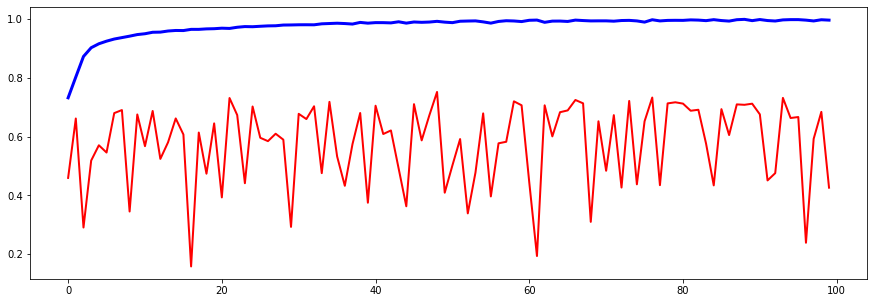

In [61]:
fig, axs  = plt.subplots(figsize = (15,5))
axs.plot(acc, color = 'b', lw = 3)
axs.plot(val_acc, color = 'r', lw = 2)

In [66]:
# # adding globel average pooling to the model
# codding lstm layers and cnn
model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: x,
                      input_shape=[128, 3]),
  tf.keras.layers.LSTM(32, return_sequences=True),
  tf.keras.layers.LSTM(32, return_sequences=True),
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1)),
  tf.keras.layers.Conv2D(64,5,strides=(2,2)),
  tf.keras.layers.MaxPooling2D((2, 2), strides = (2,2)),
  
  tf.keras.layers.Conv2D(128,3,strides=(1,1)),  
  tf.keras.layers.GlobalAveragePooling2D(),
  # tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1)),
  # parameters ?
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(6, activation='softmax')
  
])

In [ ]:
# with out bidirection
optimizer = tf.keras.optimizers.Adam(0.001)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics = ['accuracy'])

history = model.fit(features,target, epochs=100,validation_split=0.3, verbose=1)